# [HHL Implementation on Qiskit](https://arxiv.org/pdf/1811.01726.pdf)

## Problem Statement

### System of Equations:
$β_{0} −\sqrt{2}β_{1} +\frac{1}{\sqrt{2}}β_{2} −\frac{1}{2}β_{3} = −\frac{1}{8}+\frac{1}{8\sqrt{2}}$

$β_{0} −\sqrt{2}β_{1} − \frac{1}{\sqrt{2}}β_{2} + \frac{1}{2}β_{3} =\frac{3}{8}−\frac{3}{8\sqrt{2}}$

$β_{0} +\sqrt{2}β_{1} − \frac{1}{\sqrt{2}}β_{2} - \frac{1}{2}β_{3} =-\frac{1}{8}−\frac{1}{8\sqrt{2}}$

$β_{0} +\sqrt{2}β_{1} + \frac{1}{\sqrt{2}}β_{2} + \frac{1}{2}β_{3} =\frac{3}{8}+\frac{3}{8\sqrt{2}}$

$\begin{bmatrix}
-\sqrt{2} &1  &\frac{1}{\sqrt{2}}  &-\frac{1}{2} \\ 
-\sqrt{2} &1  &-\frac{1}{\sqrt{2}}  &-\frac{1}{2} \\ 
-\sqrt{2} &-1  &\frac{1}{\sqrt{2}}  &\frac{1}{2} \\ 
\sqrt{2} &1  &\frac{1}{\sqrt{2}}  &\frac{1}{2}
\end{bmatrix}\begin{bmatrix}
\beta_{0}\\ \beta_{1}
\\ \beta_{2}
\\ \beta_{3}
\end{bmatrix}=\begin{bmatrix}
-\frac{1}{8}+\frac{1}{8\sqrt{2}}\\\frac{3}{8}-\frac{3}{8\sqrt{2}}
\\\frac{1}{8}+\frac{1}{8\sqrt{2}} 
\\ -\frac{3}{8}+\frac{3}{8\sqrt{2}}
\end{bmatrix}$

Considering $A=X^{T}X= \frac{1}{4}\begin{bmatrix}
15 &9 &5  &-3 \\ 
9 &15 &3  &-5 \\ 
5 &3 &15  &-9 \\ 
-3 &-5 &-9  &15 
\end{bmatrix}$
Here , A is a Hermitian matrix with eigenvalues λ1 = 1, λ2 =2, λ3 = 4 and λ4 = 8. 
The corresponding eigen vectors are:

$|u1\rangle = −|00\rangle − |01\rangle − |10\rangle + |11\rangle$

$|u2\rangle = +|00\rangle + |01\rangle − |10\rangle + |11\rangle$

$|u3\rangle = +|00\rangle − |01\rangle + |10\rangle + |11\rangle$

$|u4\rangle = −|00\rangle + |01\rangle + |10\rangle + |11\rangle$

### Implementation

![](https://i.imgur.com/qrusfm4.png)

In [16]:
from qiskit import QuantumCircuit, execute,IBMQ
from math import pi
from qiskit.visualization import plot_histogram
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

ibmqfactory.load_account:WARNING:2021-02-15 22:20:01,694: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
qc = QuantumCircuit(7, 2)
#Initially applying Hadamard gate
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.h(5)
qc.h(6)

In [18]:
#application of exp(iAt/16) operator
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)
qc.cu3(0.196,-pi/2,pi/2,1,6) 
qc.cu3(pi/2,pi/2,-pi/2,1,6)
qc.u1(0.379,1)

qc.cu3(0.981,-pi/2,pi/2,1,5)
qc.u1(0.589,1)
qc.ccx(1,5,6)
qc.cu3(0.196,-pi/2,pi/2,1,5)
qc.ccx(1,5,6)
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)

In [19]:

#application of exp(iAt/8) operator
qc.h(6)
qc.ccx(2,5,6)
qc.h(6)
qc.cu3(1.963,-pi/2,pi/2,2,6) 
qc.cu3(pi/2,pi/2,-pi/2,2,6)
qc.u1(1.115,2)
qc.cu3(1.963,-pi/2,pi/2,2,5)
qc.u1(2.615,2)
qc.ccx(2,5,6)
qc.cu3(0.178,-pi/2,pi/2,2,5)
qc.ccx(2,5,6)
qc.h(6)
qc.ccx(2,5,6)
qc.h(6)

In [20]:
#application of exp(iAt/4) operator
qc.h(6)
qc.ccx(3,5,6)
qc.h(6)
qc.cu3(-0.785,-pi/2,pi/2,3,6) 
qc.cu3(pi/2,pi/2,-pi/2,3,6)
qc.u1(1.017,3)
qc.cu3(3.927,-pi/2,pi/2,3,5)
qc.u1(2.517,3)
qc.ccx(3,5,6)
qc.cu3(2.356,-pi/2,pi/2,3,5)
qc.ccx(3,5,6)
qc.h(6)
qc.ccx(3,5,6)
qc.h(6)

In [21]:
#application of exp(iAt/2) operator
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)
qc.cu3(-9.014*10**(-9),-pi/2,pi/2,4,6) 
qc.cu3(pi/2,pi/2,-pi/2,4,6)
qc.u1(-0.750,4)
qc.cu3(1.571,-pi/2,pi/2,4,5)
qc.u1(0.750,4)
qc.ccx(4,5,6)
qc.cu3(-1.571,-pi/2,pi/2,4,5)
qc.ccx(4,5,6)
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)

In [22]:
#Applying Inverse Fourier Transform
qc.h(1)
qc.cu1(pi/2,2,1)
qc.cu1(pi/4,3,1)
qc.cu1(pi/8,4,1)
qc.h(2)
qc.cu1(pi/2,3,2)
qc.cu1(pi/4,4,2)
qc.h(3)
qc.cu1(pi/2,4,3)
qc.h(4)


#applying control-Ry operations
qc.cu3(8*pi/2,0,0,1,0)
qc.cu3(4*pi/2,0,0,2,0)
qc.cu3(2*pi/2,0,0,3,0)
qc.cu3(pi/2,0,0,4,0)

#Applying Quantum Fourier Transform
qc.h(4)
qc.cu1(-pi/2,4,3)
qc.h(3)
qc.cu1(-pi/4,4,2)
qc.cu1(-pi/2,3,2)
qc.h(2)
qc.cu1(-pi/8,4,1)
qc.cu1(-pi/4,3,1)
qc.cu1(-pi/2,2,1)
qc.h(1)

In [23]:
##Uncomputation
#application of exp(-iAt/2) operator
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)
qc.ccx(4,5,6)
qc.cu3(-1.571,-pi/2,pi/2,4,5)
qc.ccx(4,5,6)
qc.u1(0.750,4)
qc.cu3(1.571,-pi/2,pi/2,4,5)
qc.u1(-0.750,4)
qc.cu3(pi/2,pi/2,-pi/2,4,6)
qc.cu3(-9.014*10**(-9),-pi/2,pi/2,4,6) 
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)

#application of exp(-iAt/4) operator
qc.h(6)
qc.ccx(3,5,6)
qc.h(6)
qc.ccx(3,5,6)
qc.cu3(2.356,pi/2,-pi/2,3,5)
qc.ccx(3,5,6)
qc.u1(-2.517,3)
qc.cu3(3.927,pi/2,-pi/2,3,5)
qc.u1(-1.017,3)
qc.cu3(pi/2,3*pi/2,-3*pi/2,3,6)
qc.cu3(-0.785,pi/2,-pi/2,3,6)
qc.h(6)
qc.ccx(3,5,6)
qc.h(6)

#application of exp(-iAt/8) operator
qc.h(6)
qc.ccx(2,5,6)
qc.h(6)
qc.ccx(2,5,6)
qc.cu3(0.178,pi/2,-pi/2,2,5)
qc.ccx(2,5,6)
qc.u1(-2.615,2)
qc.cu3(1.963,pi/2,-pi/2,2,5)
qc.u1(-1.115,2)
qc.cu3(pi/2,3*pi/2,-3*pi/2,2,6)
qc.cu3(1.963,pi/2,-pi/2,2,6)
qc.h(6)
qc.ccx(2,5,6)
qc.h(6)

#Applying exp(-iAt/16) operator
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)
qc.ccx(1,5,6)
qc.cu3(0.196,pi/2,-pi/2,1,5)
qc.ccx(1,5,6)
qc.u1(0.589,1)
qc.cu3(0.981,pi/2,-pi/2,1,5)
qc.u1(0.379,1)
qc.cu3(pi/2,3*pi/2,-3*pi/2,1,6)
qc.cu3(0.196,pi/2,-pi/2,1,6)
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)


In [24]:
#At the end applying Hadamard gates
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.measure([5,6], [0,1])

### Circuit

In [25]:
print(qc)

                                                                        »
q_0: ───────────────────────────────────────────────────────────────────»
     ┌───┐                                                              »
q_1: ┤ H ├───────■──────────────────■───────────────────────■───────────»
     ├───┤       │                  │                       │           »
q_2: ┤ H ├───────┼──────────────────┼───────────────────────┼───────────»
     ├───┤       │                  │                       │           »
q_3: ┤ H ├───────┼──────────────────┼───────────────────────┼───────────»
     ├───┤       │                  │                       │           »
q_4: ┤ H ├───────┼──────────────────┼───────────────────────┼───────────»
     ├───┤       │                  │                       │           »
q_5: ┤ H ├───────■──────────────────┼───────────────────────┼───────────»
     ├───┤┌───┐┌─┴─┐┌───┐┌──────────┴───────────┐┌──────────┴──────────┐»
q_6: ┤ H ├┤ H ├┤ X ├┤ H ├┤ U3(0.196,-p

### Results

In [26]:
# get a backend
backend = provider.get_backend('ibmq_qasm_simulator')
# execute circuit
job=execute(qc, backend, shots=8192)
counts = job.result().get_counts()
print('RESULT: ',counts,'\n')

RESULT:  {'00': 1864, '11': 1990, '10': 2021, '01': 2317} 



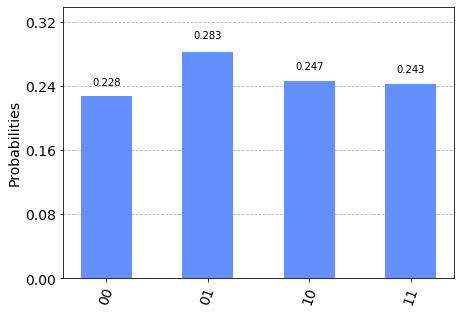

In [27]:
plot_histogram(counts)

### Execution results
After executing the circuits on the Strangeworks backend, the outcomes 00, 01, 10, and 11 are obtained with 22%, 25%, 27%, and 26%(Approx) which clearly shows the required solution state.